# **Introduction**

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease

Link to dataset: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## **Loading libraries**


In [60]:
!pip install ml_insights -q

In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import pandas as pd
import ml_insights as mli

In [61]:
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

## **Loading dataset**

In [62]:
# Loading dataset
dataset = pd.read_csv('/content/heart.csv')
X = dataset.iloc[:,:-1]
y = dataset.target

In [63]:
dataset['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [64]:
print('Dataset size',X.shape)
print('Target size',y.shape)

Dataset size (1025, 13)
Target size (1025,)


## **Splitting Train & Test**

In [65]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                     test_size = 0.2, random_state = 13)

## **Fitting model**

In [66]:
# Creating and fitting model
model = SVC()
model.fit(X_train, y_train)


SVC()

## **Fitting probabilities**

In [67]:
# Predict Probabilities
prob = model.decision_function(X_test)

## **Plotting calibration plot**

In the preceding plot, we notice that our SVM model tends to overestimate the probabilities. Specifically, at a probability of 0.2, our model predicts a higher value than what is empirically observed. Similarly, at a probability of 0.5, our model predicts 0.8, which implies that for individuals with a 50-50 chance of heart disease, our model suggests an 80% probability of having the condition.

/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:1000: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


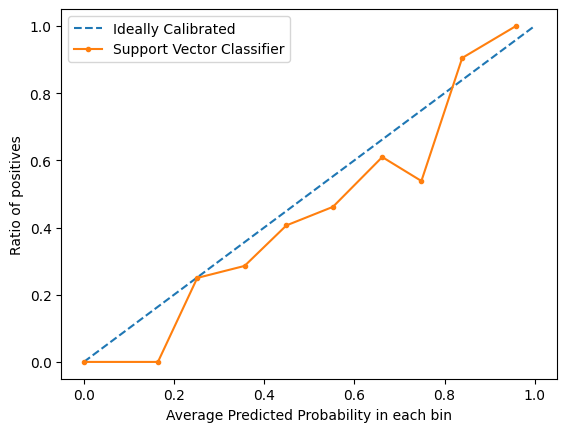

In [68]:
# Creating Calibration Curve
x, y = calibration_curve(y_test, prob, n_bins = 10, normalize = True)
# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')

# Plot model's calibration curve
plt.plot(y, x, marker = '.', label = 'Support Vector Classifier')

leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

## **How to fix calibration ?**

## Plat scaling

In [72]:
# Fit Platt scaling (logistic calibration)
lr = LogisticRegression(C=99999999999, solver='lbfgs')
lr.fit(prob.reshape(-1,1), y_test)
testset_platt_probs = lr.predict_proba(prob.reshape(-1,1))[:,1]

/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:1000: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


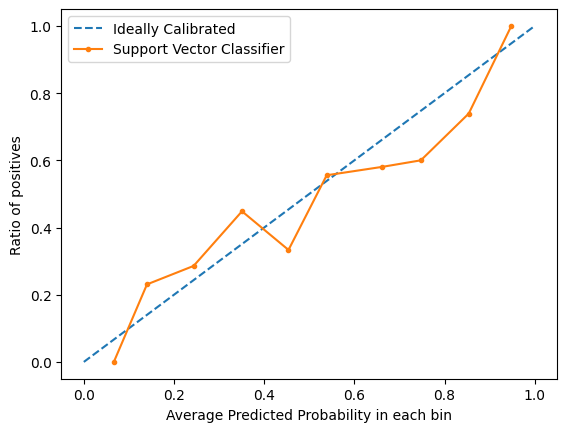

In [73]:
# Creating Calibration Curve
x, y = calibration_curve(y_test, testset_platt_probs, n_bins = 10, normalize = True)
# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')

# Plot model's calibration curve
plt.plot(y, x, marker = '.', label = 'Support Vector Classifier')

leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

## Isotonic Scaling

In [74]:
iso = IsotonicRegression(out_of_bounds = 'clip')
iso.fit(prob, y_test)
testset_iso_probs = iso.predict(prob)

/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:1000: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


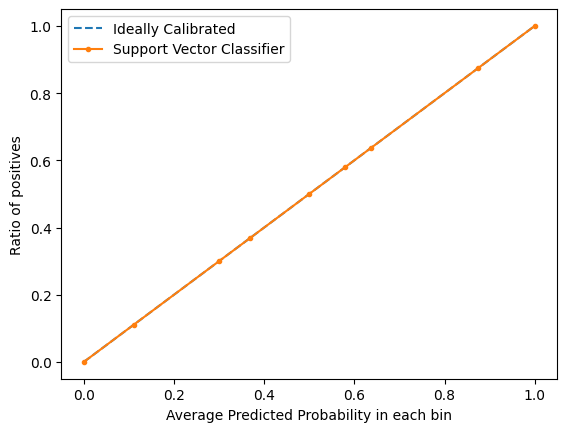

In [75]:
# Creating Calibration Curve
x, y = calibration_curve(y_test, testset_iso_probs, n_bins = 10, normalize = True)
# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')

# Plot model's calibration curve
plt.plot(y, x, marker = '.', label = 'Support Vector Classifier')

leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

### **Please Note:**  For simplicity I used test data for calibrating the predictions. For calibrating your models, please perform above techniques like Plat scaling, Isotonic scaling on validation set, instead of directly doing on test set. We do not want to show actual holdout sample